In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import LinearNDInterpolator
import specutils
import sklearn
from sklearn import preprocessing
from astropy.visualization import simple_norm
import os
from astropy.io import ascii

# Chi-square for 3 synthetic models

Chi-square value for model syn-files-2\syn-files-2\synthetic1.csv: 248.92647111260666
Chi-square value for model syn-files-2\syn-files-2\Synthetic2.csv: 984.9565685099017
Chi-square value for model syn-files-2\syn-files-2\Synthetic3.csv: 625.5176011696728


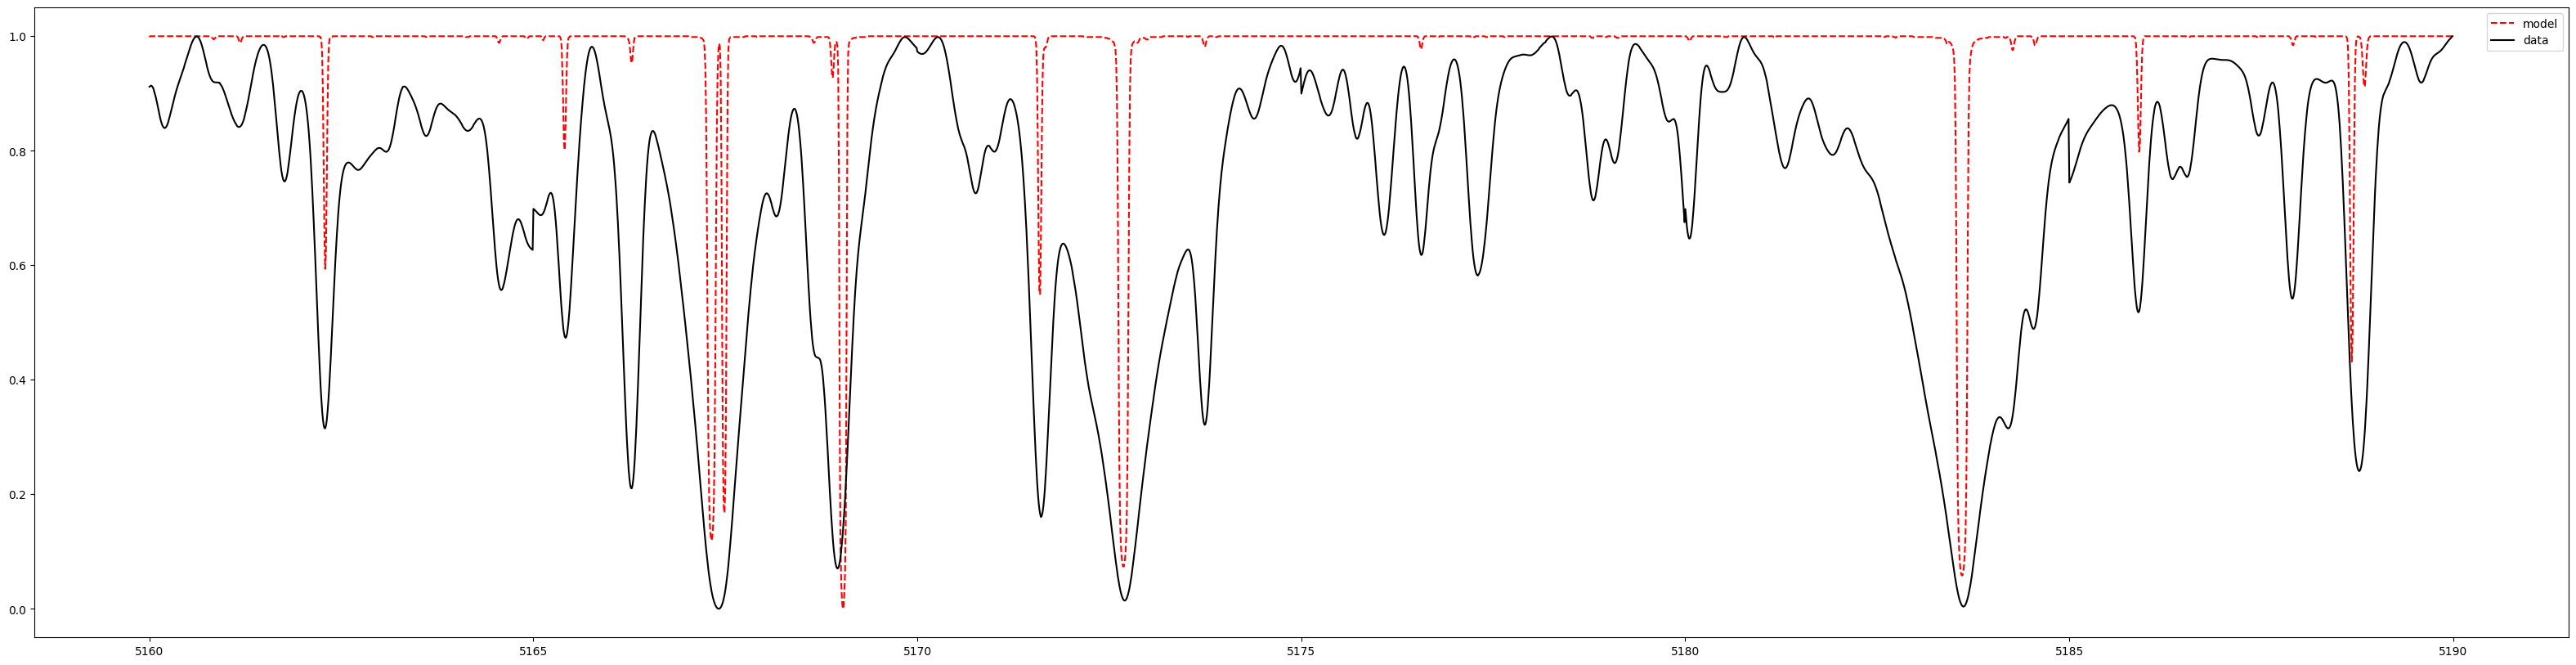

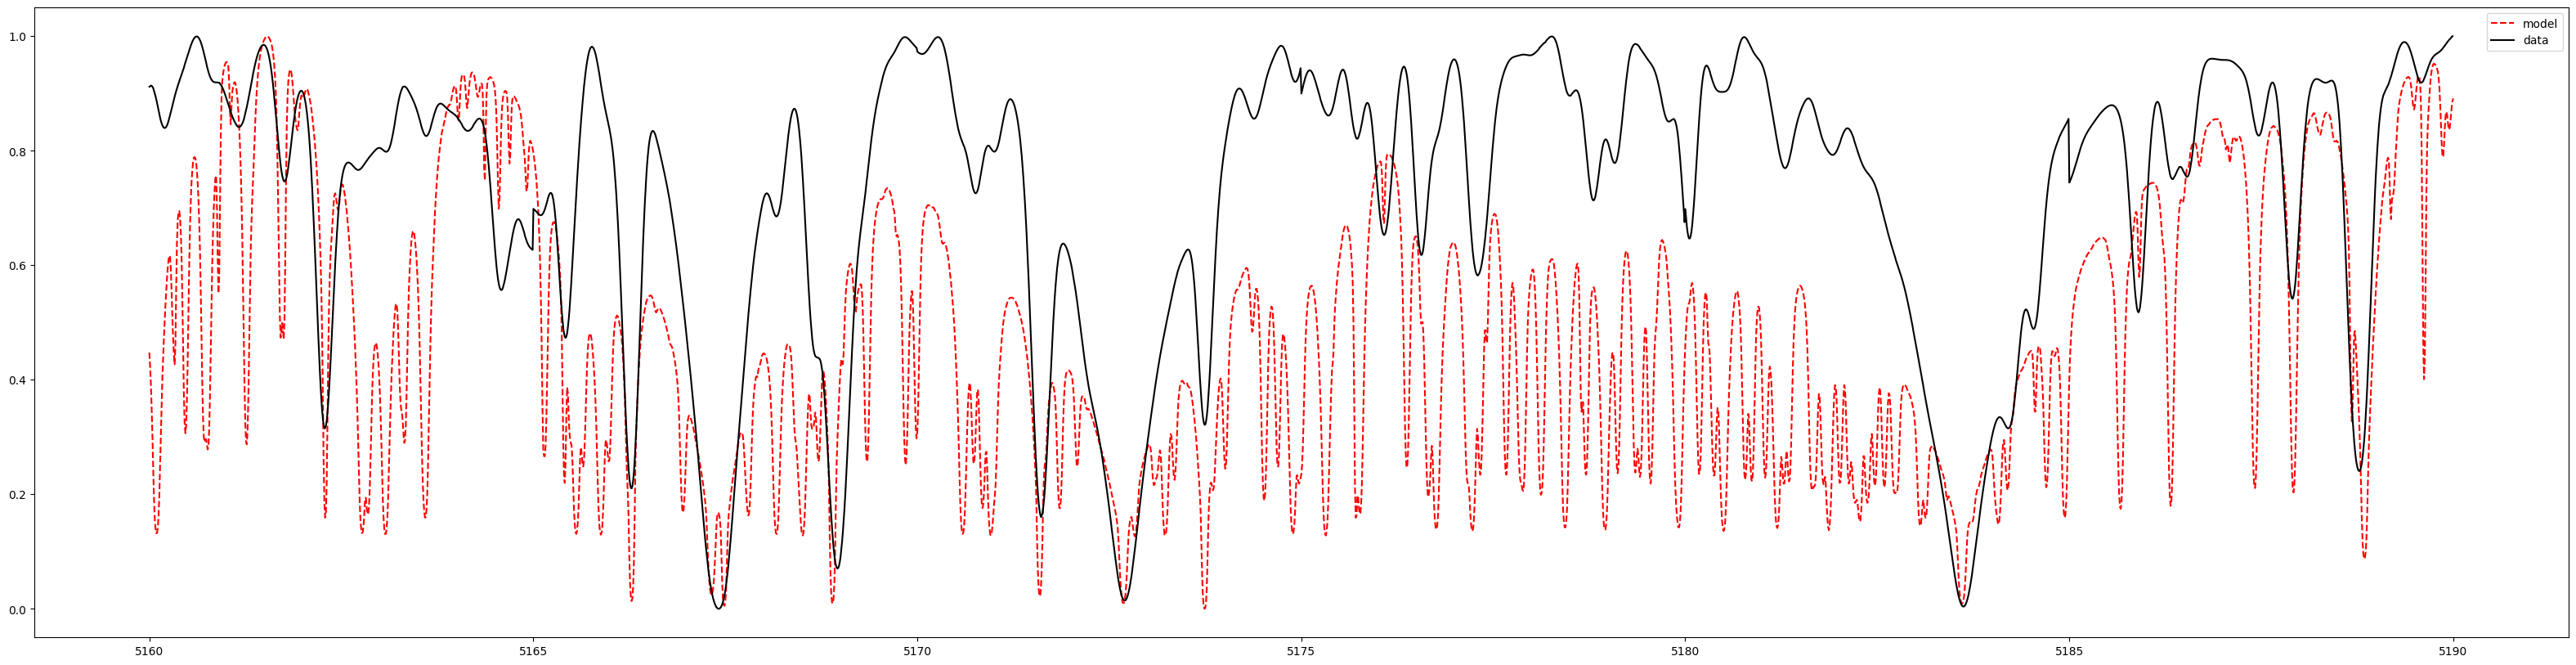

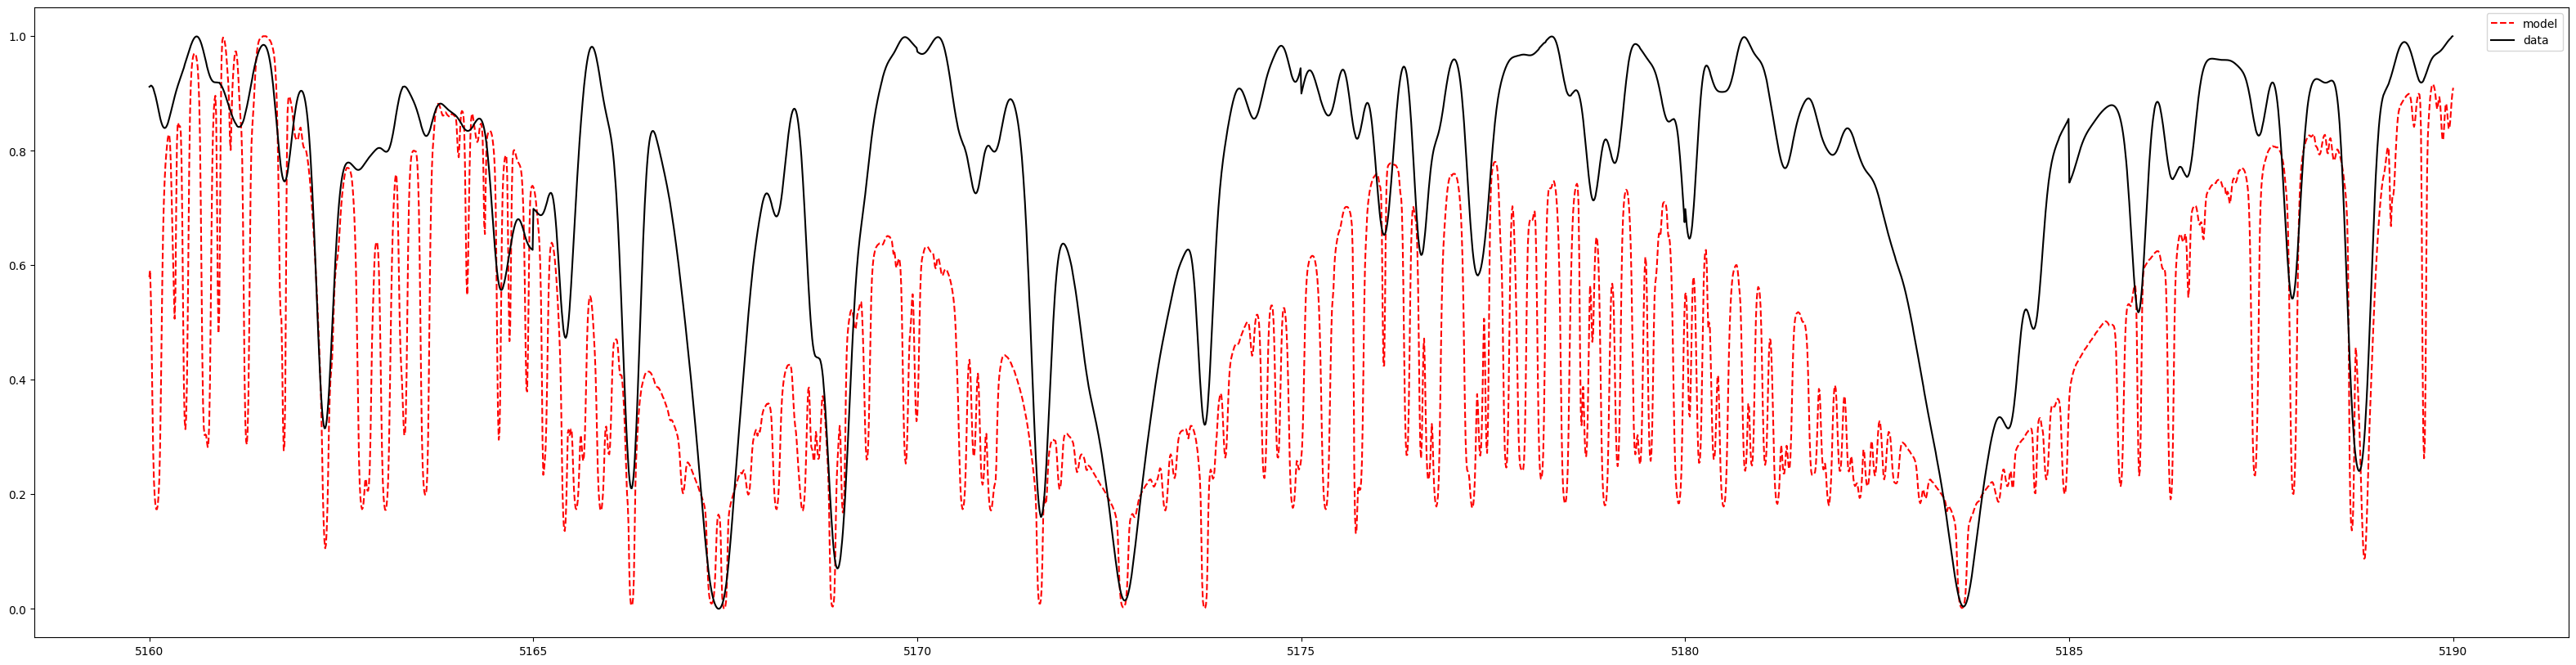

In [66]:
df = pd.read_csv("Hrdata (2).csv")
dfn = df.to_numpy(dtype="float64")
x = dfn[:, 0]
y = dfn[:, 1]
x1 = x[(x >= 5160) & (x <= 5190)]
y1 = y[(x >= 5160) & (x <= 5190)]
ns = []
y2 = (y1 - min(y1)) / (max(y1) - min(y1))
ns.append((x1, y2))


import scipy

chisquare = []
synthetic_data = "syn-files-2"
synthetic_files = []
for root, dire, files in os.walk(synthetic_data):
    for f in files:
        file_path = os.path.join(root, f)
        synthetic_files.append(file_path)

for sf in synthetic_files:
    dff = pd.read_csv(sf, na_values=["NaN"], skipinitialspace=True)
    dff = dff.drop(dff.columns[0], axis=1)
    dffn = dff.to_numpy(dtype="float64")  # converting to arrays
    p = dffn[:, 0]  # extracting wavelengths
    q = dffn[:, 1]
    p1 = p[(p >= 5160) & (p <= 5190)]
    q1 = q[(p >= 5160) & (p <= 5190)]
    cs = 0
    nss = []
    q2 = (q1 - min(q1)) / (max(q1) - min(q1))
    nss.append((p1, q2))
    q_interp = np.interp(x1, p1, q2)
    u = scipy.stats.chisquare(f_obs=y2, f_exp=np.sum(y2) / np.sum(q_interp) * q_interp)
    cs += u.statistic
    chisquare.append(cs)
    plt.figure(figsize=(40, 10))
    plt.plot(p1, q2, "--", c="r", label="model")
    plt.legend()
    print(f"Chi-square value for model {sf}: {cs}")
    for x1, y1 in ns:

        plt.plot(x1, y1, c="k", label="data")
    plt.legend()

# Chi-square for library of synthetic spectra

In [70]:
df = pd.read_csv("Hrdata (2).csv")
dfn = df.to_numpy(dtype="float64")
x = dfn[:, 0]
y = dfn[:, 1]
x1 = x[(x >= 5160) & (x <= 5190)]
y1 = y[(x >= 5160) & (x <= 5190)]
ns = []
y2 = (y1 - min(y1)) / (max(y1) - min(y1))
ns.append((x1, y2))


import scipy

chisquare = []
synthetic_data = "synthetic-files-1"
synthetic_files = []
for root, dire, files in os.walk(synthetic_data):
    for f in files:
        file_path = os.path.join(root, f)
        synthetic_files.append(file_path)

for sf in synthetic_files:
    dff = pd.read_csv(
        sf,
        names=["wavelength", "N.flux"],
        sep=" ",
        na_values=["NaN"],
        skipinitialspace=True,
    )

    dffn = dff.to_numpy(dtype="float64")  # converting to arrays
    p = dffn[:, 0]  # extracting wavelengths
    q = dffn[:, 1]
    p1 = p[(p >= 5160) & (p <= 5190)]
    q1 = q[(p >= 5160) & (p <= 5190)]
    cs = 0
    nss = []
    q2 = (q1 - min(q1)) / (max(q1) - min(q1))
    nss.append((p1, q2))
    q_interp = np.interp(x1, p1, q2)
    u = scipy.stats.chisquare(f_obs=y2, f_exp=np.sum(y2) / np.sum(q_interp) * q_interp)
    cs += u.statistic
    chisquare.append(cs)
    # plt.figure(figsize=(40,10))
    # plt.plot(p1,q2,'--',c='r',label='model')
    # plt.legend()
    # print(f"Chi-square value for model {sf}: {cs}")
    # for x1,y1 in ns:

    # plt.plot(x1,y1,c='k',label='data')
    # plt.legend()

In [90]:
min_indices = np.argsort(chisquare)[:2]

# Print corresponding models and their chi-square values
for idx in min_indices:
    min_model = synthetic_files[idx]
    min_chi_square = chisquare[idx]
    print(f"Model with minimum chi-square ({min_chi_square}): {min_model}")

Model with minimum chi-square (17.262446328559786): synthetic-files-1\synthetic-files-1\p00t5500g4.0_0.spc.r09
Model with minimum chi-square (18.272327430647685): synthetic-files-1\synthetic-files-1\p00t5500g4.0_0.spc.r10


synthetic-files-1\synthetic-files-1\p00t5500g4.0_0.spc.r09
synthetic-files-1\synthetic-files-1\p00t5500g4.0_0.spc.r10


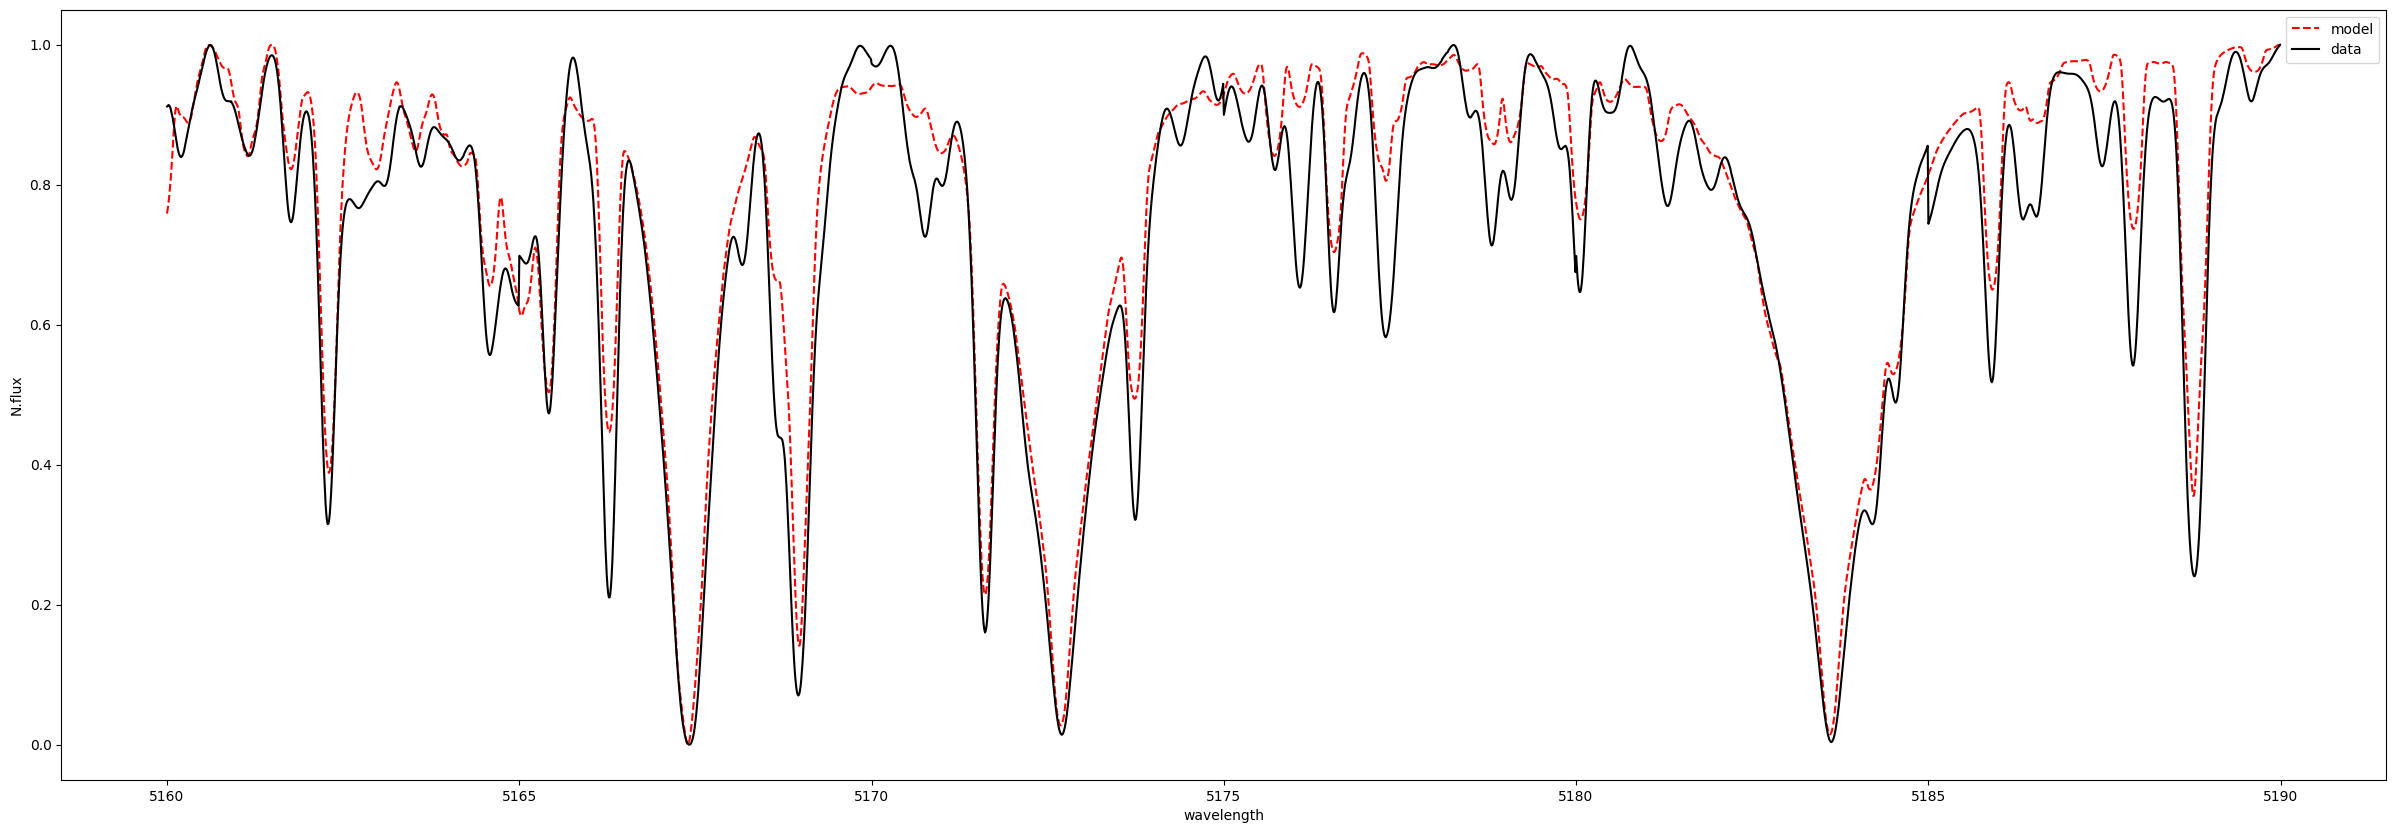

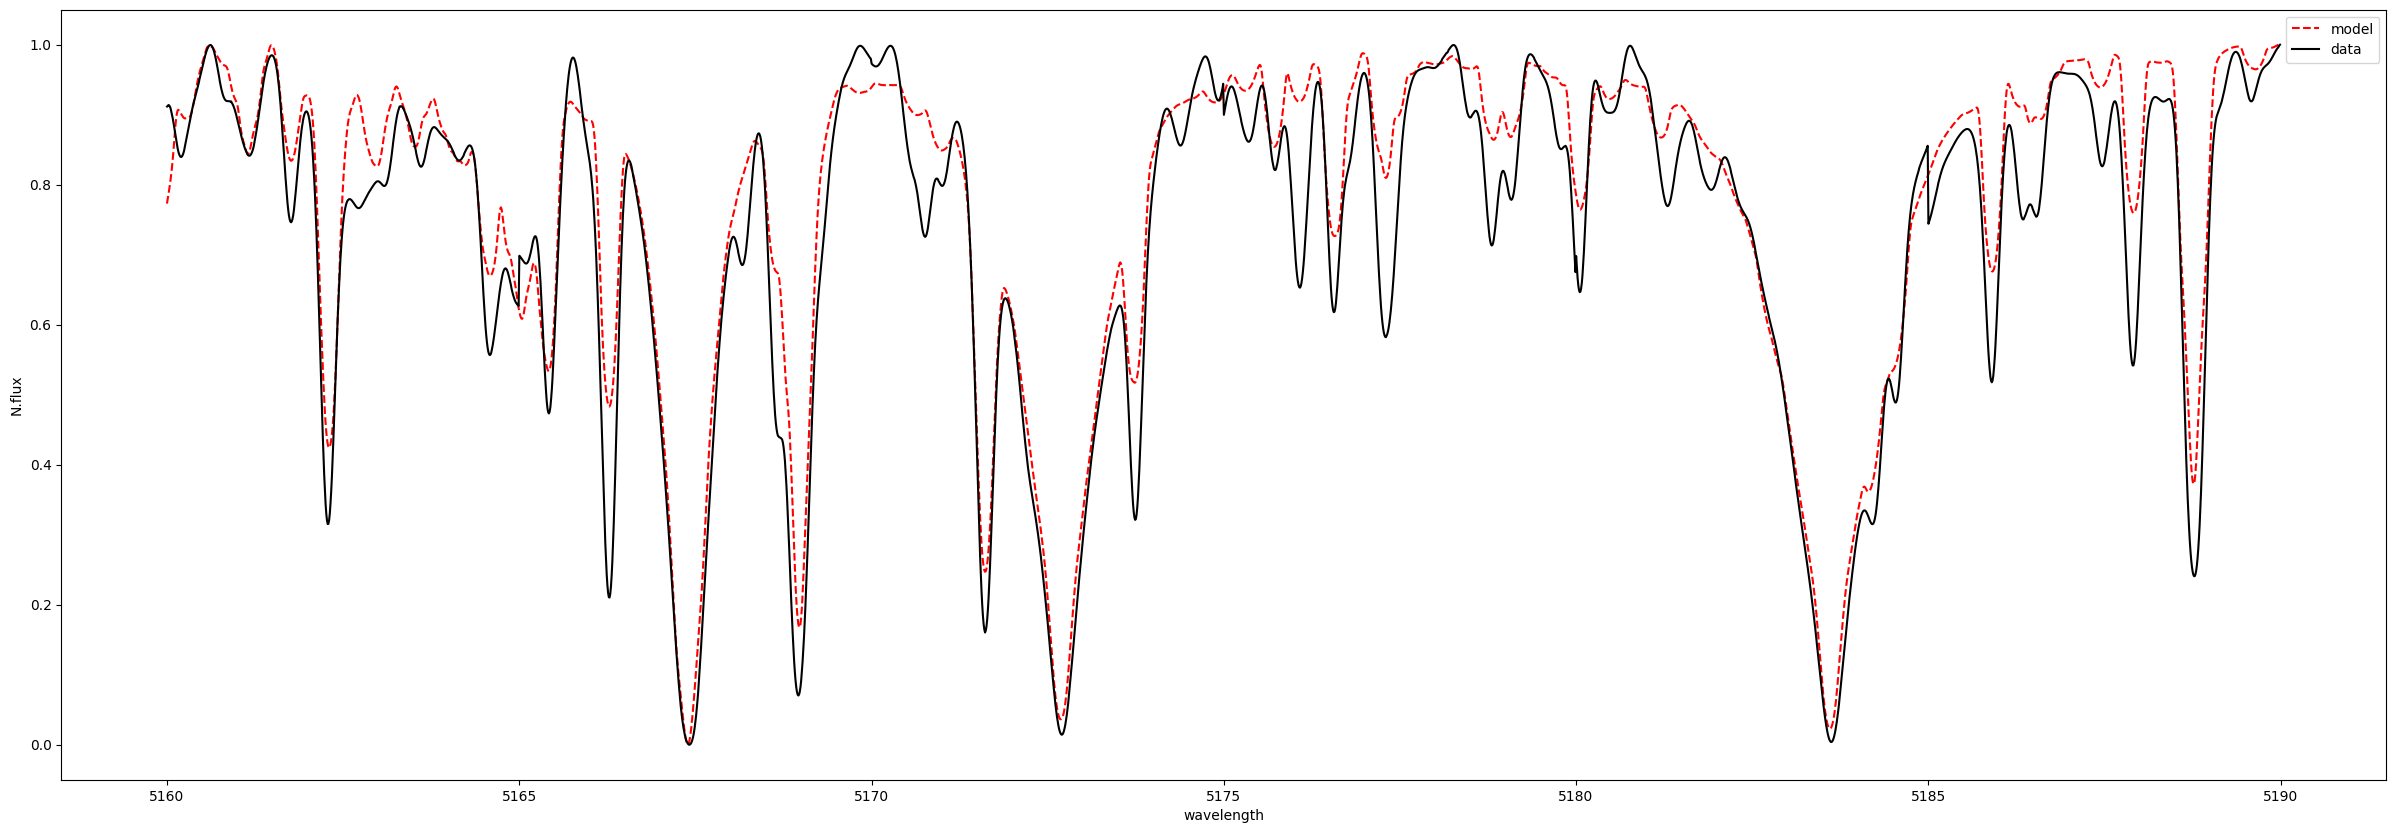

In [122]:
# plt.figure(figsize=(40, 10))
# plt.plot(x1,y1,c='k')
for idx in min_indices:
    min_model = synthetic_files[idx]
    print(min_model)
    dff_min = pd.read_csv(
        min_model,
        names=["wavelength", "N.flux"],
        sep=" ",
        na_values=["NaN"],
        skipinitialspace=True,
    )
    dffn_min = dff_min.to_numpy(dtype="float64")
    m = dffn_min[:, 0]  # extracting wavelengths
    n = dffn_min[:, 1]
    m1 = m[(m >= 5160) & (m <= 5190)]
    n1 = n[(m >= 5160) & (m <= 5190)]
    n2 = (n1 - min(n1)) / (max(n1) - min(n1))

    plt.figure(figsize=(30, 10))
    plt.plot(m1, n2, "--", c="r", label="model")
    plt.legend()
    for x1, y1 in ns:
        plt.plot(x1, y1, c="k", label="data")
        plt.legend()
        plt.xlabel("wavelength")
        plt.ylabel("N.flux")

synthetic-files-1\synthetic-files-1\p00t5500g4.0_0.spc.r09
synthetic-files-1\synthetic-files-1\p00t5500g4.0_0.spc.r10


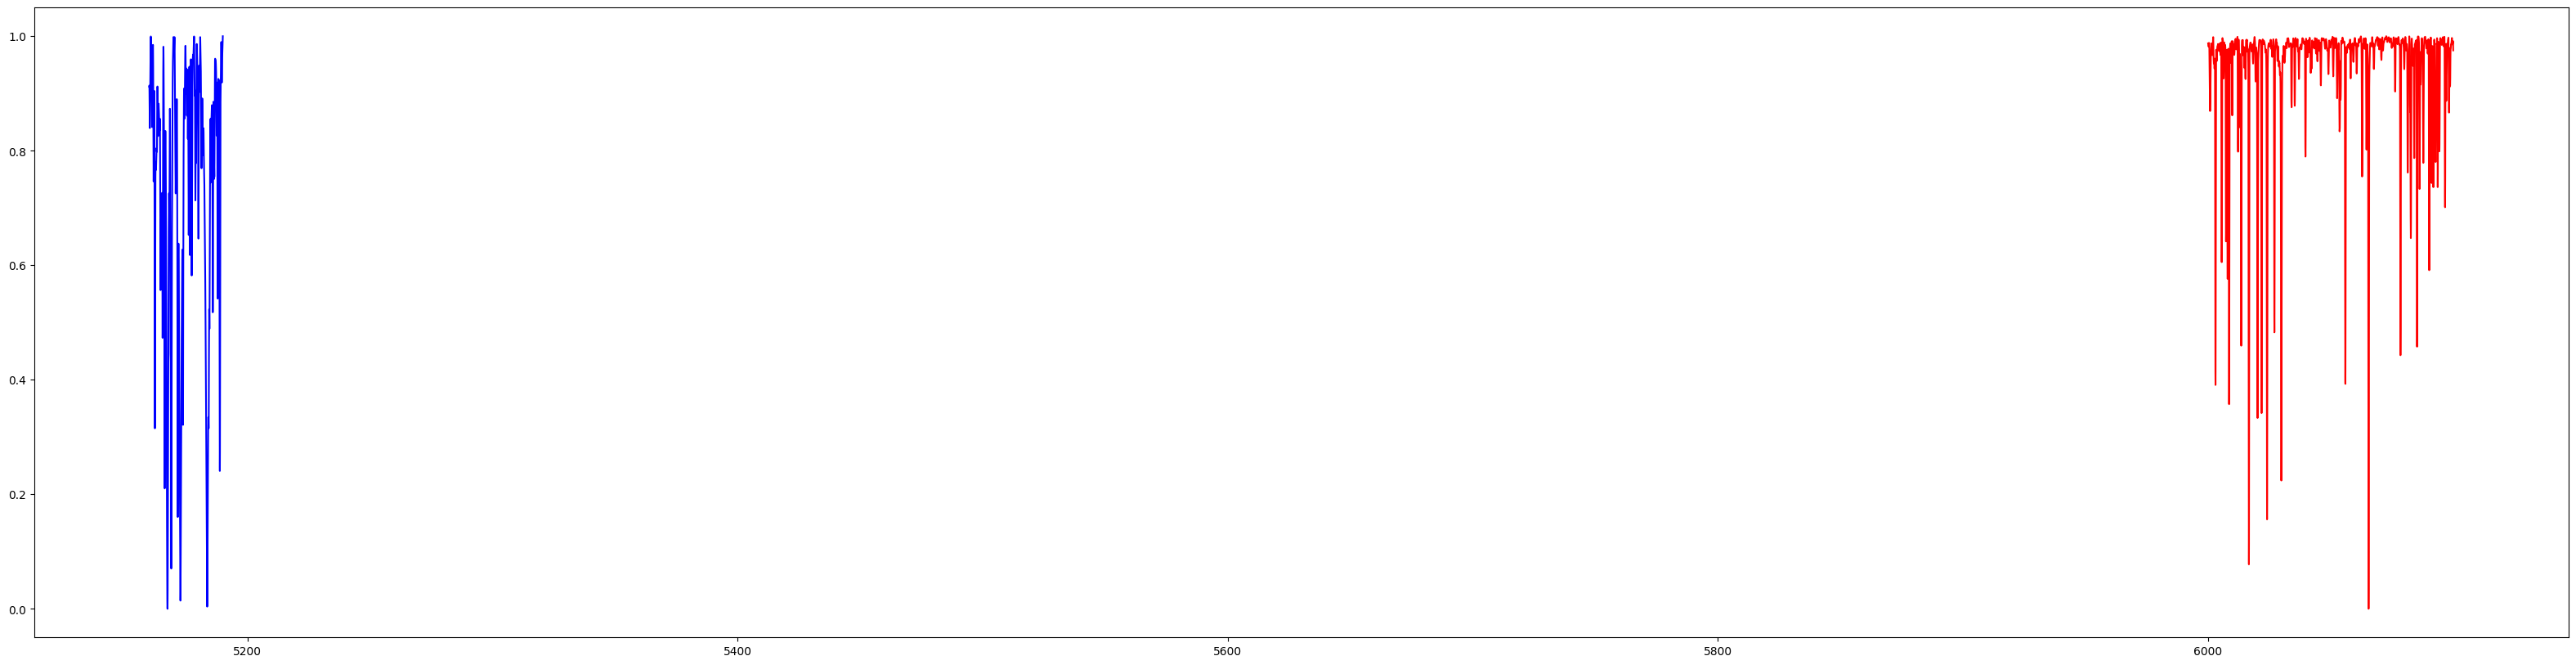

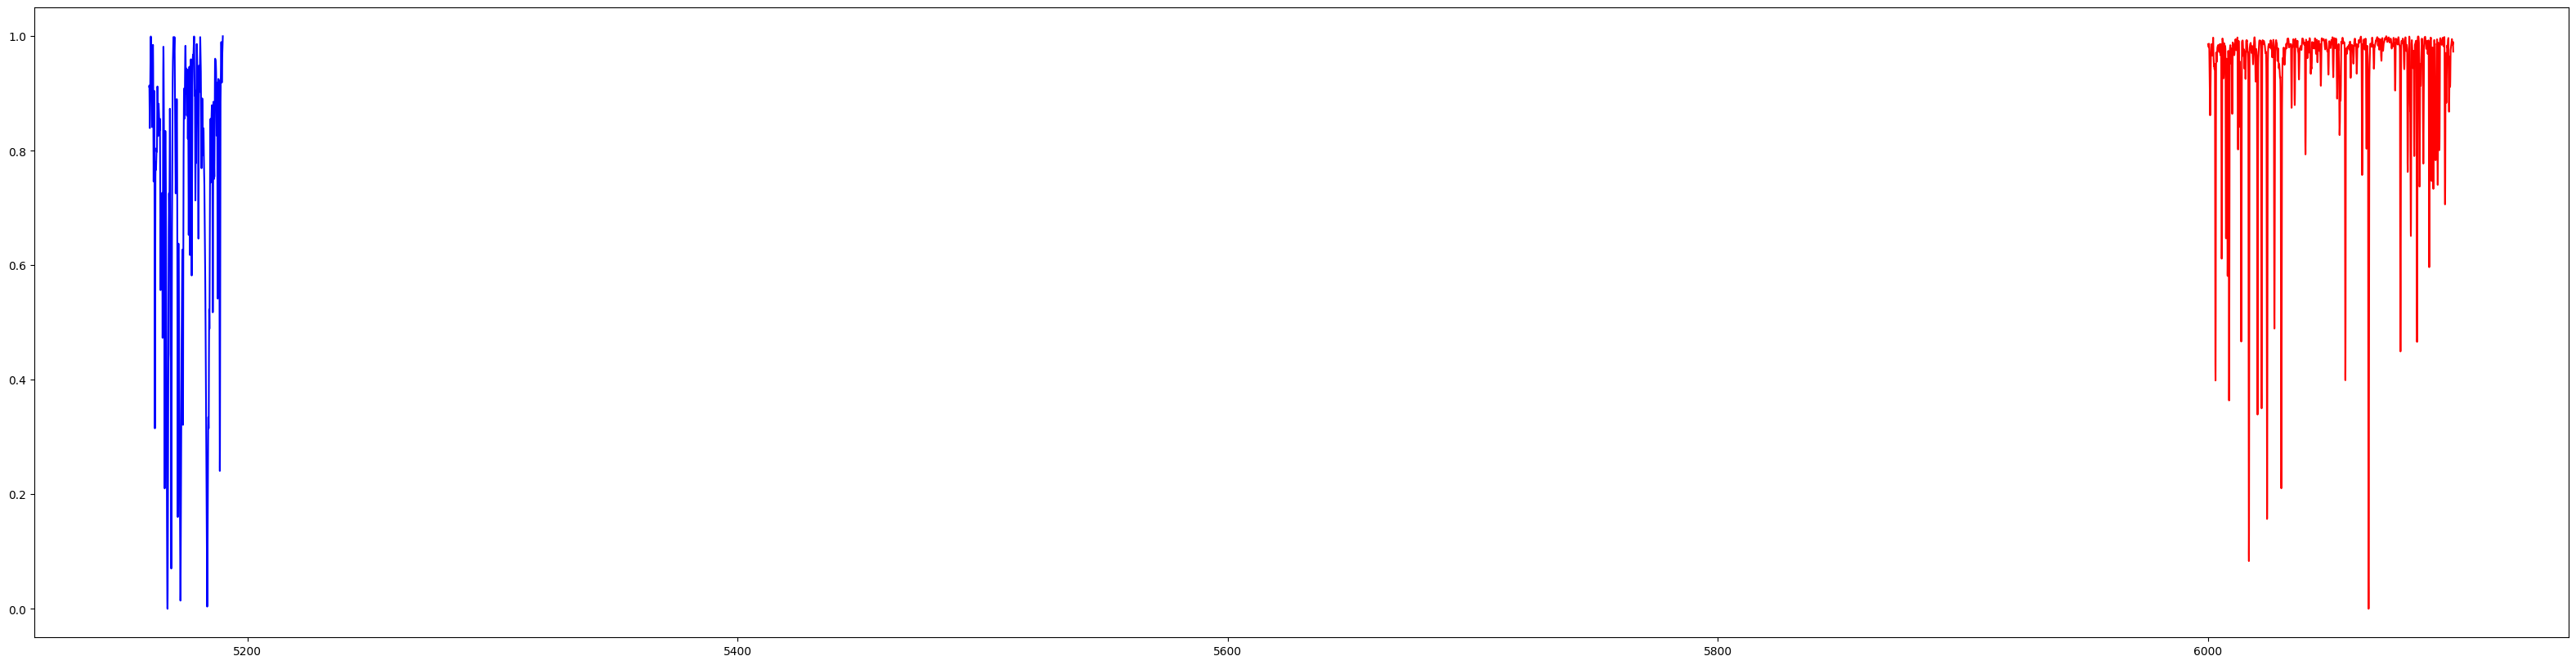

In [115]:
for idx in min_indices:
    min_model = synthetic_files[idx]
    print(min_model)
    dff_min = pd.read_csv(
        min_model,
        names=["wavelength", "N.flux"],
        sep=" ",
        na_values=["NaN"],
        skipinitialspace=True,
    )
    dffn_min = dff_min.to_numpy(dtype="float64")
    m = dffn_min[:, 0]  # extracting wavelengths
    n = dffn_min[:, 1]
    m1 = m[(m >= 6000) & (m <= 6100)]
    n1 = n[(m >= 6000) & (m <= 6100)]
    n2 = (n1 - min(n1)) / (max(n1) - min(n1))
    plt.figure(figsize=(40, 10))
    plt.plot(m1, n2, c="r")
    for x1, y1 in ns:
        plt.plot(x1, y1, c="b")

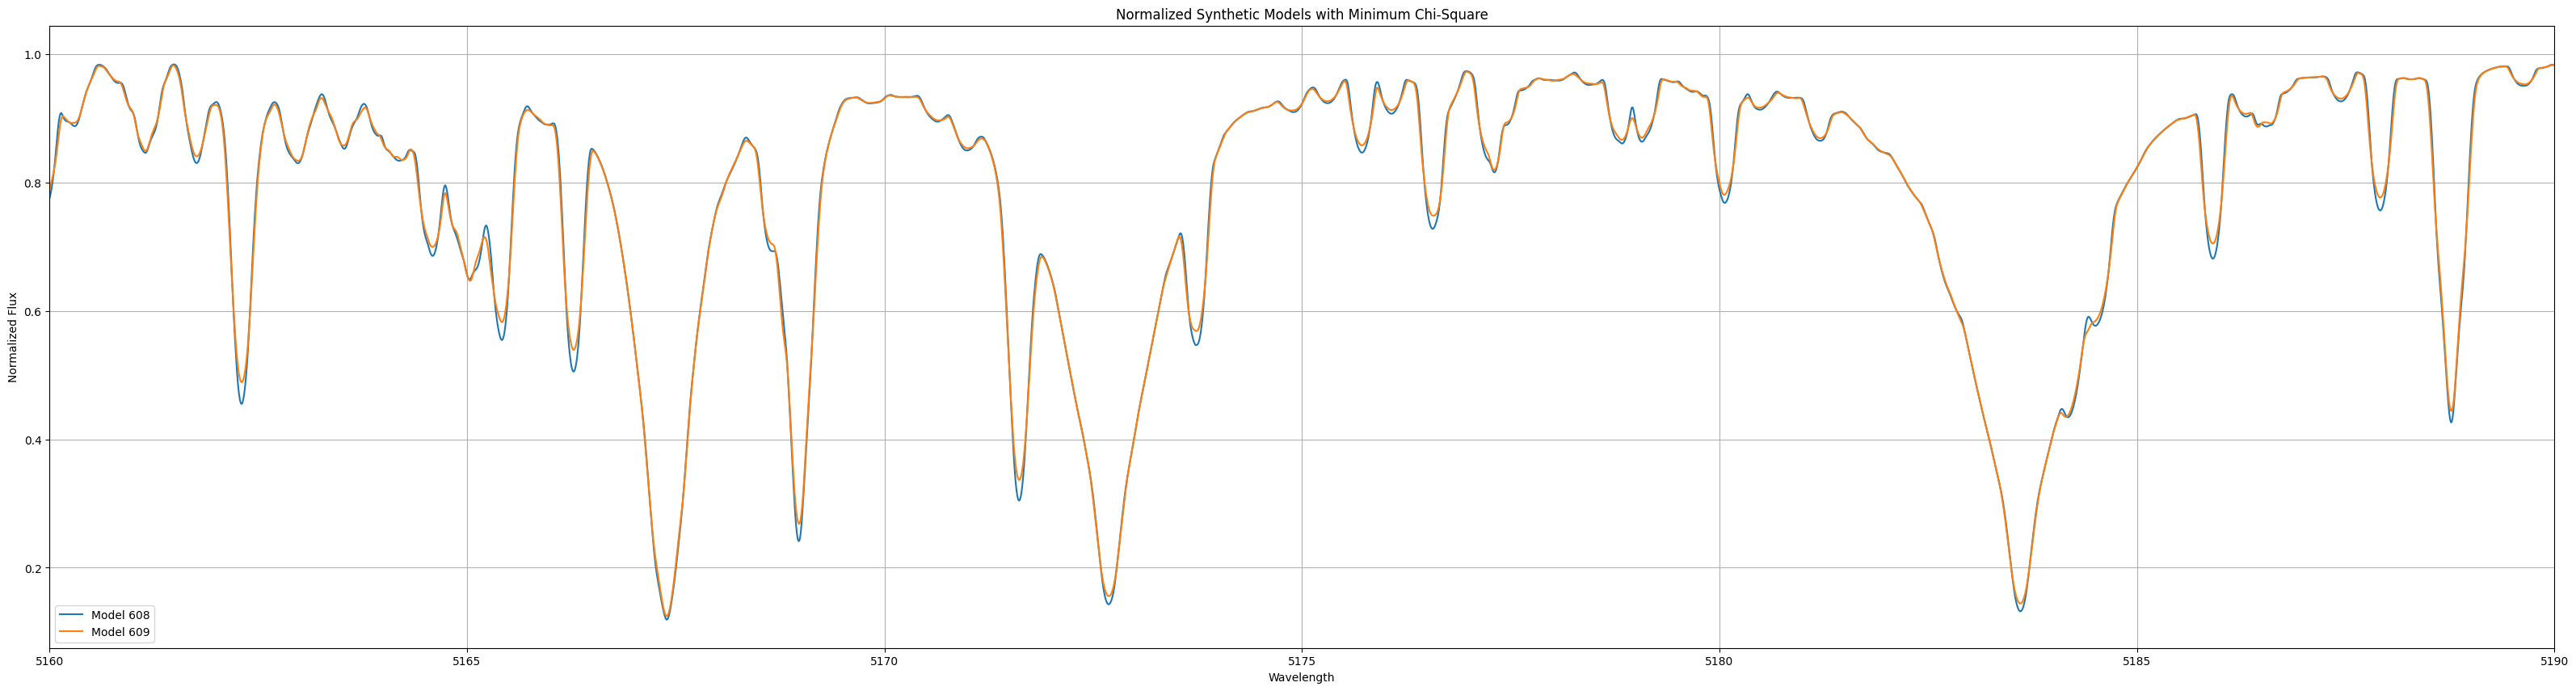

In [108]:
import matplotlib.pyplot as plt

# Load data for the models with the first two minimum chi-square values
min_models_data = []
for idx in min_indices:
    min_model = synthetic_files[idx]
    dff_min = pd.read_csv(
        min_model,
        names=["wavelength", "N.flux"],
        sep=" ",
        na_values=["NaN"],
        skipinitialspace=True,
    )
    dffn_min = dff_min.to_numpy(dtype="float64")
    min_models_data.append(dffn_min)

# Plot the data for the models
plt.figure(figsize=(40, 10))
for idx, model_data in zip(min_indices, min_models_data):
    plt.plot(model_data[:, 0], model_data[:, 1], label=f"Model {idx + 1}")
    plt.xlim(5160, 5190)

# Add labels and legend
plt.xlabel("Wavelength")
plt.ylabel("Normalized Flux")
plt.title("Normalized Synthetic Models with Minimum Chi-Square")
plt.legend()
plt.grid(True)
plt.show()